#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

#### Importing the Dataset

In [2]:
dataset = pd.read_csv('placement.csv')
dataset.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [3]:
# If you want to use the MyPerceptron() function which takes a numpy array as input, you should use x = dataset.iloc[:,:-1].values. 
# If you want to perform operations on the input data using pandas dataframe methods, you should use x = dataset.iloc[:,:-1]
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

#### Visualising the Dataset

<AxesSubplot:xlabel='cgpa', ylabel='resume_score'>

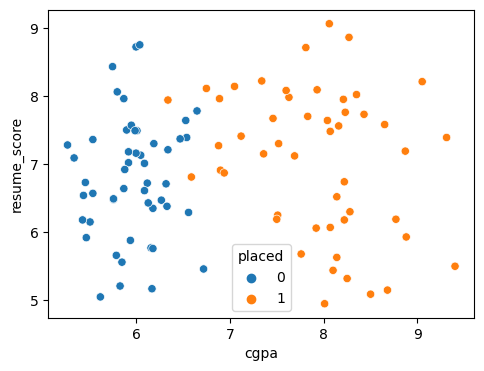

In [4]:
plt.figure( figsize = (5.5, 4))
sns.scatterplot(dataset['cgpa'], dataset['resume_score'], hue = dataset['placed'])

#### Making our own Perceptron function to calculate values of weights and bias

In [5]:
# Define MyPerceptron function
def MyPerceptron(x, y):
    # Insert a column of ones at the beginning of x to represent the bias term
    x = np.insert(x, 0, 1, axis=1)
    # Initialize weights to an array of ones with the same number of columns as x
    weights = np.ones(x.shape[1])
    # Set the learning rate
    lr = 0.07
    
    # Iterate for 1000 epochs
    for i in range(20000):
        # Choose a random index n
        n = np.random.randint(0, x.shape[0])
        # Calculate the predicted output y_hat using the current weights
        y_hat = step(np.dot(x[n], weights))
        # Update the weights using the perceptron learning rule
        weights = weights + lr * (y[n] - y_hat) * x[n]
    
    # Return the bias term (first element of weights) and the remaining weights
    return weights[0], weights[1:]

In [6]:
# Define step function
def step(z):
    # This function returns 1 if z > 0, and 0 otherwise
    return 1 if z > 0 else 0

#### Pass the input data and target labels to the MyPerceptron function

In [7]:
bias, weights = MyPerceptron(x, y)

In [8]:
print(weights)
print(bias)

[ 3.975  -0.4875]
-22.940000000000072


#### Visualising the Classification Line

In [9]:
slope = -(weights[0]/weights[1])
intercept = -(bias/weights[1])

In [10]:
# define an array of 100 evenly spaced values between the minimum and maximum CGPA values in the dataset
x_input = np.linspace(dataset['cgpa'].min(), dataset['cgpa'].max(), 100)
# calculate the corresponding values of the resume score using the slope and y-intercept of the decision boundary line
y_input = slope * x_input + intercept

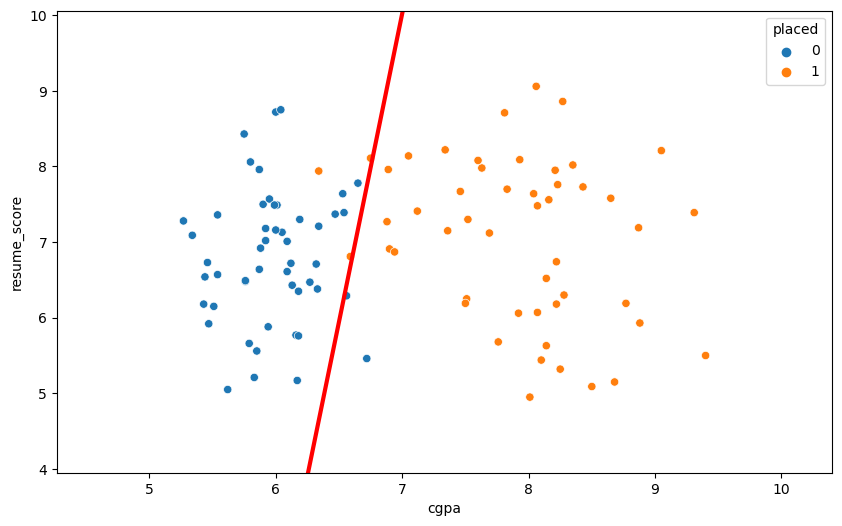

In [11]:
# set the size of the figure
plt.figure(figsize=(10,6))
# create a scatter plot of the data points, with color coded by the 'placed' column
sns.scatterplot(dataset['cgpa'], dataset['resume_score'], hue = dataset['placed'])
# plot the decision boundary line obtained from the perceptron model
plt.plot(x_input, y_input, color='red', linewidth=3)
# set the y-axis limits to include all data points plus some padding
plt.ylim(dataset['resume_score'].min()-1, dataset['resume_score'].max()+1)
# set the x-axis limits to include all data points plus some padding
plt.xlim(dataset['cgpa'].min()-1, dataset['cgpa'].max()+1)
# display the plot
plt.show()